In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Finding the Churn Ratio i.e. the retension ratio. Probability of staying for a member.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
y = dataset["Exited"]

In [8]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [9]:
#One-Hot Encoding
geo = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

In [10]:
X = pd.concat([X,geo,gender], axis=1)

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_test.shape

(2000, 11)

In [17]:
from keras.models import Sequential

In [18]:
model = Sequential()

In [19]:
#model.summary()

In [20]:
from keras.layers import Dense

In [21]:
#first layer: hidden layer
model.add(Dense(units=8, activation='relu', input_dim=11))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(Dense(units=6, activation='relu'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(units=6, activation='relu'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Output layer: Binary classification, only 2 values : sigmoid function
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initiali

In [30]:
from keras.optimizers import Adam

In [31]:
model.compile(loss='binary_crossentropy', optimizer=Adam())

In [32]:
model.get_weights()

[array([[ 0.2833675 , -0.48221347,  0.01208109, -0.17726353, -0.18159577,
          0.22982174, -0.4351846 , -0.26548353],
        [-0.4934908 , -0.25415018,  0.24879986,  0.11662298,  0.16775352,
          0.33291882,  0.02848196,  0.30530763],
        [-0.07468215,  0.18980956, -0.5433398 ,  0.47336155, -0.12448037,
          0.53765434,  0.52257365,  0.10329068],
        [ 0.07633209,  0.3540212 , -0.5600941 ,  0.53058153, -0.14589047,
          0.08886802,  0.21116722, -0.51653194],
        [-0.4532232 , -0.07622477,  0.46867186, -0.11477154, -0.41184253,
          0.23033059, -0.13412529,  0.06323087],
        [-0.3788827 , -0.48469502, -0.29307973,  0.54888755, -0.00488222,
         -0.53939706,  0.18319654,  0.37579352],
        [-0.4778969 , -0.5207247 ,  0.12242943,  0.37289435, -0.13424924,
          0.5325627 ,  0.17406636, -0.2353704 ],
        [ 0.50732297, -0.14120024, -0.37019962,  0.09214693, -0.54273903,
          0.2690825 , -0.51683956, -0.467516  ],
        [-0.5607

In [33]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 2ms/step - loss: 425.2488
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 11.5578
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 8.9178
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 6.3919
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 7.1241
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 7.8960
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 8.3932
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 7.0191
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 6.6275
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 7.1679
Epoch 11/200
250/250 [==============================] - 0s 1ms/step - loss: 6.1177
Epoch 12/200
250/250 [==============================] - 0s 1ms/step - loss: 5.2821
Epoch 13/2

250/250 [==============================] - 0s 1ms/step - loss: 0.5063
Epoch 100/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5061
Epoch 101/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5061
Epoch 102/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5063
Epoch 103/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5063
Epoch 104/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5061
Epoch 105/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5101
Epoch 106/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5069
Epoch 107/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5066
Epoch 108/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 109/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 110/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 

250/250 [==============================] - 0s 1ms/step - loss: 0.5067
Epoch 197/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5066
Epoch 198/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5066
Epoch 199/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5067
Epoch 200/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5066


In [34]:
model.history.history

{'loss': [425.2488098144531,
  11.557760238647461,
  8.917825698852539,
  6.39191198348999,
  7.124133586883545,
  7.895970821380615,
  8.393240928649902,
  7.01906681060791,
  6.627538204193115,
  7.167882442474365,
  6.117731094360352,
  5.282078266143799,
  6.567655563354492,
  6.176915645599365,
  4.887979507446289,
  5.9416279792785645,
  5.6309590339660645,
  4.645229816436768,
  4.776954174041748,
  8.343009948730469,
  4.672668933868408,
  6.364073753356934,
  5.375340938568115,
  3.6147382259368896,
  4.118622303009033,
  4.482852935791016,
  4.260013103485107,
  3.991514205932617,
  4.368829250335693,
  3.4277119636535645,
  3.566861867904663,
  3.918130397796631,
  3.4747378826141357,
  2.8012826442718506,
  2.622875690460205,
  3.7912025451660156,
  2.321214437484741,
  2.7931010723114014,
  2.8720734119415283,
  3.5622963905334473,
  3.856902599334717,
  2.8439393043518066,
  2.385547637939453,
  2.7418320178985596,
  2.799258232116699,
  1.7613974809646606,
  2.1321506500

In [35]:
l = pd.DataFrame(model.history.history)

<AxesSubplot:>

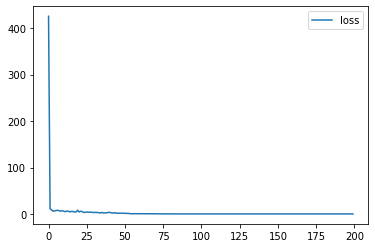

In [36]:
l.plot()

In [37]:
model = Sequential()

In [38]:
#first layer: hidden layer
model.add(Dense(units=8, activation='relu', input_dim=11))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
# Output layer: Binary classification, only 2 values : sigmoid function
model.add(Dense(units=1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer=Adam( learning_rate=0.000001))

In [40]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 3192.3064
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 3163.4529
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 3134.7659
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 3106.2317
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 3079.2881
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 3056.2629
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 3034.0107
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 3011.9399
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 2989.9382
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 2967.9639
Epoch 11/200
250/250 [==============================] - 0s 2ms/step - loss: 2945.9827
Epoch 12/200
250/250 [==============================] - 0s 1ms/

250/250 [==============================] - 0s 1ms/step - loss: 1314.2556
Epoch 97/200
250/250 [==============================] - 0s 1ms/step - loss: 1300.9489
Epoch 98/200
250/250 [==============================] - 0s 2ms/step - loss: 1287.6782
Epoch 99/200
250/250 [==============================] - 0s 2ms/step - loss: 1274.4352
Epoch 100/200
250/250 [==============================] - 0s 1ms/step - loss: 1261.2300
Epoch 101/200
250/250 [==============================] - 0s 1ms/step - loss: 1248.0643
Epoch 102/200
250/250 [==============================] - 0s 1ms/step - loss: 1234.9509
Epoch 103/200
250/250 [==============================] - 0s 1ms/step - loss: 1221.9147
Epoch 104/200
250/250 [==============================] - 0s 1ms/step - loss: 1208.9542
Epoch 105/200
250/250 [==============================] - 0s 1ms/step - loss: 1196.0688
Epoch 106/200
250/250 [==============================] - 0s 1ms/step - loss: 1183.2415
Epoch 107/200
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 1ms/step - loss: 340.9585
Epoch 191/200
250/250 [==============================] - 0s 1ms/step - loss: 333.9236
Epoch 192/200
250/250 [==============================] - 0s 1ms/step - loss: 326.9728
Epoch 193/200
250/250 [==============================] - 0s 2ms/step - loss: 320.0721
Epoch 194/200
250/250 [==============================] - 0s 1ms/step - loss: 313.2210
Epoch 195/200
250/250 [==============================] - 0s 1ms/step - loss: 306.4296
Epoch 196/200
250/250 [==============================] - 0s 1ms/step - loss: 299.6929
Epoch 197/200
250/250 [==============================] - 0s 1ms/step - loss: 293.0164
Epoch 198/200
250/250 [==============================] - 0s 1ms/step - loss: 286.4178
Epoch 199/200
250/250 [==============================] - 0s 1ms/step - loss: 279.8620
Epoch 200/200
250/250 [==============================] - 0s 1ms/step - loss: 273.3427


In [41]:
l = pd.DataFrame(model.history.history)

<AxesSubplot:>

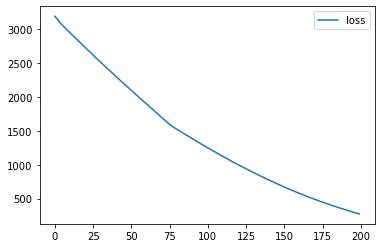

In [42]:
l.plot()